# C-OPS data processing for C-HARRIER MISSIONS
## Batch processing for mission CAPS files

This script allows for fast and easy quicklooks of C-OPS radiometry data for data efficacy checks. The following script processes all C-OPS CAPS files for a given flight mission, which provide the dark current readings for subsequent dark corrections of collected radiometry data.

In [1]:
## IMPORT NECESSARY LIBRARIES 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates

### Inputs

In the following cell, input the path to the folder containing all the CAPS files for a particular mission (path), and the path to where you would like the figures saved (outpath). 

In [2]:
path = '/Users/jakravit/OneDrive - NASA/C-HARRIER_2021_C-AIR/C-AIR_CAPS/'
outpath = '/Users/jakravit/Desktop/Caps_figs/'

### Read and plot data

The following cell reads through the directory, processing each day of files, for each sensor, and gain setting, and plots and saves the figures.

today20211019ground
CAP_L_211019_173152_URU.csv
es
li
lt
CAP_L_211019_173152_URC.csv
es
li
lt
CAP_H_211019_174143_URC.csv
es
li
lt
CAP_H_211019_174143_URU.csv
es
li
lt
CAP_L_211019_173924_URC.csv
es
li
lt
CAP_L_211019_173924_URU.csv
es
li
lt
CAP_M_211019_174034_URU.csv
es
li
lt
CAP_M_211019_174034_URC.csv
es
li
lt
today20211027_caps1
CAP_L_211027_162743_URC.csv
es
li
lt
CAP_L_211027_162743_URU.csv
es
li


KeyboardInterrupt: 

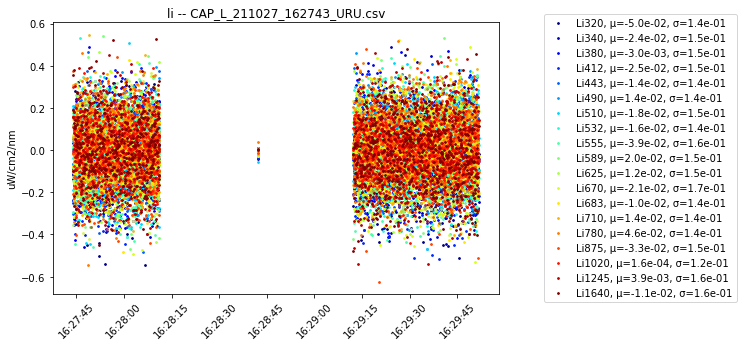

In [3]:
suffixes = ('URU.csv','URC.csv')
# process through files in path
for diry in os.listdir(path):
    print (diry)
    
    if not os.path.exists(outpath+diry):
        os.mkdir(outpath+diry)
    else:
        pass
    
    # process each gain setting and cal file
    for file in os.listdir(path+diry):
        if not file.endswith(suffixes):
            continue
        
        print (file)
        name = file[:-4]
        
        # read in data and split into sensors
        data = pd.read_csv(os.path.join(path,diry,file), sep=',', encoding='ISO-8859-1', index_col='DateTimeUTC')
        data.index = pd.to_datetime(data.index)
        sensors = {'es': data.iloc[:,5:24],
                   'li': data.iloc[:,24:43],
                   'lt': data.iloc[:,43:]}
        
        for sensor,sdata in sensors.items():
            print (sensor)
            
            # plot the data
            fig, ax = plt.subplots(figsize=(8,5))
            colormap = plt.cm.gist_ncar
            plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, sensors[sensor].shape[1]))))
            means = []
            stds = []
            labels = []
            for i,b in enumerate(sdata.columns):
                sdata.index = pd.to_datetime(sdata.index)
                ax.scatter(sdata.index,sdata[b], marker='o',s=3)
                mean = sdata[b].mean()
                std = sdata[b].std()
                means.append(mean)
                stds.append(std)
                labels.append('{}, \u03BC={:.1e}, \u03C3={:.1e}'.format(b.split(' ')[0], mean, std))
            ax.legend(labels,bbox_to_anchor=(1.09, 1.05),fontsize='medium')
            ax.set_title('{} -- {}'.format(sensor,file))
            plt.xticks(rotation=45)
            ax.set_ylabel('uW/cm2/nm')
            
            # save the figure
            fig.savefig(outpath+diry+'/'+name+'.png',bbox_inches='tight',dpi=300)
            plt.close(fig)